In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data_seoul = pd.read_csv('Airbnb Listings in Seoul (May 2016).csv')

In [23]:
data_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 16 columns):
Unnamed: 0              8519 non-null int64
room_id                 8519 non-null int64
host_id                 8519 non-null int64
room_type               8519 non-null object
borough                 8519 non-null object
neighborhood            8519 non-null object
reviews                 8519 non-null int64
overall_satisfaction    3940 non-null float64
accommodates            8519 non-null int64
bedrooms                8516 non-null float64
bathrooms               8008 non-null float64
price                   8519 non-null int64
minstay                 8295 non-null float64
latitude                8519 non-null float64
longitude               8519 non-null float64
collected               8519 non-null object
dtypes: float64(6), int64(6), object(4)
memory usage: 1.0+ MB


In [1]:
data_seoul #accommodates = 최대 수용 인원 수/ # minstay = 최소 숙박 수

NameError: name 'data_seoul' is not defined

In [25]:
data_seoul.isnull().sum()

Unnamed: 0                 0
room_id                    0
host_id                    0
room_type                  0
borough                    0
neighborhood               0
reviews                    0
overall_satisfaction    4579
accommodates               0
bedrooms                   3
bathrooms                511
price                      0
minstay                  224
latitude                   0
longitude                  0
collected                  0
dtype: int64

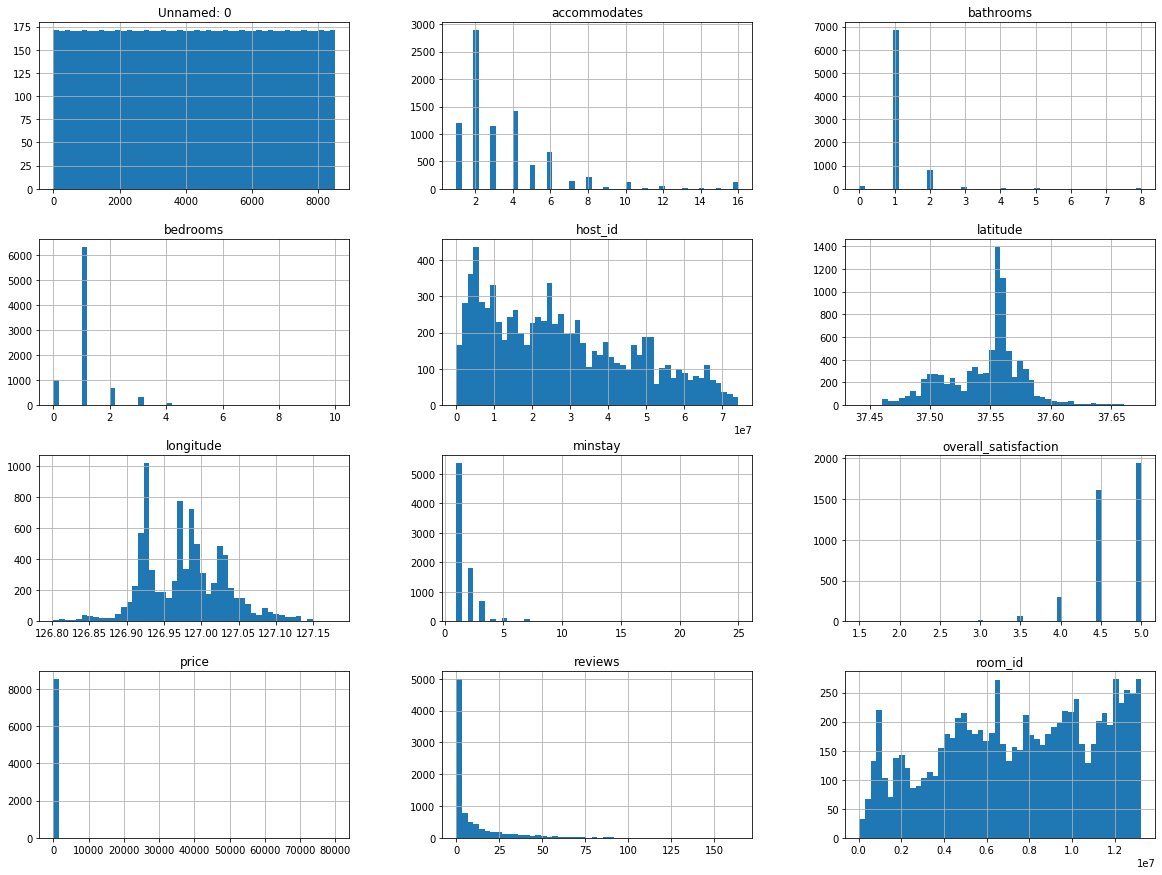

In [26]:
data_seoul.hist(bins =50, figsize =(20,15))
plt.show()

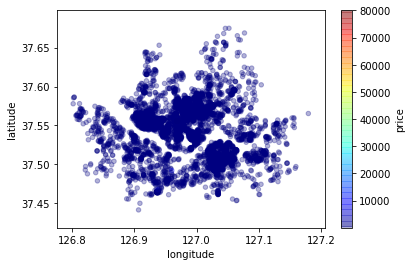

In [27]:
data_seoul.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.3,
                 c = 'price',cmap = plt.get_cmap('jet'),
                colorbar = True, sharex = False)
plt.savefig("download.png")

In [28]:
corr_matrix = data_seoul.corr()
corr_matrix['price'].sort_values(ascending =False)

price                   1.000000
bedrooms                0.020909
accommodates            0.015779
host_id                 0.007301
room_id                 0.006309
Unnamed: 0              0.005260
bathrooms               0.004828
latitude                0.003476
longitude               0.001608
minstay                 0.000333
reviews                -0.010012
overall_satisfaction   -0.012199
Name: price, dtype: float64

In [29]:
drop_data = ["Unnamed: 0",'room_id','host_id','borough','neighborhood',
 'reviews','overall_satisfaction','collected']
data_seoul.drop(drop_data,axis = 1,inplace = True)

In [30]:
data_seoul.info()
data_seoul.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 8 columns):
room_type       8519 non-null object
accommodates    8519 non-null int64
bedrooms        8516 non-null float64
bathrooms       8008 non-null float64
price           8519 non-null int64
minstay         8295 non-null float64
latitude        8519 non-null float64
longitude       8519 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 532.6+ KB


,room_type,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
0,Shared room,6,1.0,1.0,20,2.0,37.553134,126.925835
1,Private room,1,1.0,1.0,46,2.0,37.555893,126.928023
2,Entire home/apt,2,0.0,1.0,151,1.0,37.576998,126.997793
3,Shared room,6,1.0,1.0,14,1.0,37.575486,126.990546
4,Private room,1,1.0,1.0,35,1.0,37.577231,126.991428


In [31]:
data_seoul['price'].unique()

array([   20,    46,   151,    14,    35,    36,    37,    59,    98,
         114,   157,   119,   109,    55,    71,   200,   212,    50,
         113,    52,    30,   201,    45,    65,    60,    90,    15,
          85,    88,    80,    95,    40,    77,    57,    39,   185,
          49,    13,    67,    25,    23,    38,   225,   205,    10,
          72,    56,    31,    81,    24,    18,    63,    75,    93,
         110,    53,    78,    70,    48,    79,    87,    96,   131,
          43,    61,    99,   167,   174,    42,    21,    12,    51,
          34,    91,   139,    26,   108,    28,    47,    84,    41,
          62,   130,   102,    74,    16,    29,    33,    58,   124,
         105,   117,   155,    22,    69,   309,   515,   400,    54,
         180,    92,   350,    83,   123,    27,   234,    97,   260,
         150,    73,   192,    19,    76,    82,    32,    66,    11,
         104,   249,   100,    44,   103,   287,    17,   219,   305,
          64,   170,

In [32]:
data_1 = data_seoul[data_seoul.price >= 200]

data_2 = data_1[data_1.accommodates < 6]
data_2.index.values

array([  17,   27,   64,  238,  287,  538,  655,  798,  893,  976, 1034,
       1472, 1527, 1548, 1551, 1560, 1562, 1645, 1785, 1896, 1923, 1978,
       2223, 2236, 2253, 2268, 2269, 2434, 2529, 2621, 2969, 3006, 3042,
       3235, 3437, 3697, 3755, 3864, 4063, 4073, 4083, 4084, 4106, 4152,
       4369, 4502, 4503, 4504, 4670, 4671, 4863, 4879, 4928, 4958, 5054,
       5256, 5264, 5439, 5455, 5617, 5645, 5647, 5916, 5949, 6003, 6265,
       6369, 6522, 6544, 6568, 6575, 6576, 6578, 6659, 6665, 6709, 6723,
       6724, 6821, 6891, 6892, 7110, 7357, 7556, 7566, 7618, 7714, 7733,
       7947, 8125, 8146, 8147, 8150, 8153, 8175, 8206, 8207, 8210, 8230,
       8304, 8496, 8504], dtype=int64)

In [33]:
data_seoul.drop(data_2.index.values, inplace = True)
data_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8518
Data columns (total 8 columns):
room_type       8417 non-null object
accommodates    8417 non-null int64
bedrooms        8414 non-null float64
bathrooms       7915 non-null float64
price           8417 non-null int64
minstay         8193 non-null float64
latitude        8417 non-null float64
longitude       8417 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 591.8+ KB


In [34]:
data_seoul.dropna(axis = 0, inplace = True)
data_seoul.reset_index(drop = True,inplace = True)

In [35]:
data_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 8 columns):
room_type       7696 non-null object
accommodates    7696 non-null int64
bedrooms        7696 non-null float64
bathrooms       7696 non-null float64
price           7696 non-null int64
minstay         7696 non-null float64
latitude        7696 non-null float64
longitude       7696 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 481.1+ KB


In [36]:
data_seoul['price'].unique()

array([  20,   46,  151,   14,   35,   36,   37,   98,  114,  157,  119,
        109,   71,  200,   50,  113,   52,   30,   55,   45,   65,   60,
         90,   15,   85,   88,   80,   95,   40,   77,   57,   39,  185,
         49,   13,   67,   25,   23,   38,  225,   10,   72,   56,   31,
         81,   18,   63,   75,   93,  110,   53,   78,   70,   48,   79,
         87,  131,   59,   61,   99,  167,  174,   42,   21,   12,   51,
         34,   91,  139,   26,  108,   28,   24,   47,   84,   41,   62,
        130,  102,   43,   74,   16,   29,   33,   58,  124,  105,  117,
        155,   22,   69,  309,  515,   54,  180,   92,  350,   83,  201,
        123,  234,  260,  150,   73,  192,   19,   82,   66,   11,   32,
         96,  104,  100,   27,   44,  103,  287,   17,  305,   64,  170,
        149,  436,  392,  262,   68,  144,  125,   94,  116,  126,  349,
         76,  101,  208,  143,  122,  166,  216,  160,  297,  390,  261,
        145,  115,  156,  313,  500,  152,  132,  3

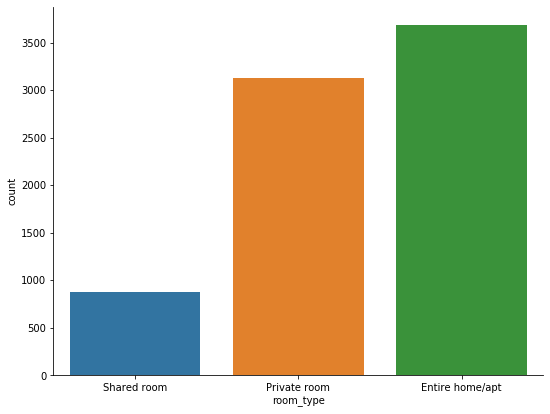

In [38]:
import seaborn as sns
sns.catplot(x='room_type', kind='count' ,data=data_seoul)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig("download2.png")

In [39]:
from sklearn.preprocessing import OneHotEncoder

roomtype = data_seoul[['room_type']]
encoder = OneHotEncoder()
roomtype = encoder.fit_transform(roomtype)
roomtype.toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [40]:
roomtype = pd.DataFrame(columns = encoder.categories_[0],data = roomtype.toarray())

In [41]:
roomtype.head()

,Entire home/apt,Private room,Shared room
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [42]:
value = data_seoul[['price']]
data_seoul.drop(['price','room_type'],axis = 1 , inplace = True)
data_seoul


,accommodates,bedrooms,bathrooms,minstay,latitude,longitude
0,6,1.0,1.0,2.0,37.553134,126.925835
1,1,1.0,1.0,2.0,37.555893,126.928023
2,2,0.0,1.0,1.0,37.576998,126.997793
3,6,1.0,1.0,1.0,37.575486,126.990546
4,1,1.0,1.0,1.0,37.577231,126.991428
...,...,...,...,...,...,...
7691,3,1.0,1.0,2.0,37.498812,126.996915
7692,6,0.0,1.0,2.0,37.551192,127.127658
7693,4,1.0,1.0,1.0,37.561568,126.924160
7694,4,1.0,1.0,2.0,37.562035,126.924369


In [43]:
# from sklearn.preprocessing import RobustScaler

# robust_scaler = RobustScaler()

# robust_scaler.fit(data_seoul)

# data_seoul = robust_scaler.transform(data_seoul)

# data_seoul = pd.DataFrame(data_seoul, columns = ['accommodates','bedrooms','bathrooms',
#                                                 'minstay','latitude','longitude'])

#data_seoul

In [44]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

stand.fit(data_seoul)
data_seoul = stand.transform(data_seoul)
data_seoul = pd.DataFrame(data_seoul, columns = ['accommodates','bedrooms','bathrooms',
                                                'minstay','latitude','longitude'])
data_seoul

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude
0,0.906442,-0.125673,-0.248143,0.178528,0.248414,-0.930420
1,-0.942381,-0.125673,-0.248143,0.178528,0.337838,-0.890535
2,-0.572616,-1.312397,-0.248143,-0.411152,1.021882,0.381301
3,0.906442,-0.125673,-0.248143,-0.411152,0.972876,0.249195
4,-0.942381,-0.125673,-0.248143,-0.411152,1.029434,0.265273
...,...,...,...,...,...,...
7691,-0.202852,-0.125673,-0.248143,0.178528,-1.512243,0.365296
7692,0.906442,-1.312397,-0.248143,0.178528,0.185471,2.748608
7693,0.166913,-0.125673,-0.248143,-0.411152,0.521773,-0.960954
7694,0.166913,-0.125673,-0.248143,0.178528,0.536909,-0.957144


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_seoul)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.513898,-0.621687
1,-0.570388,-0.852471
2,-1.085328,-0.934941
3,0.503035,-0.599118
4,-0.583085,-0.822811
...,...,...
7691,-0.646720,1.200412
7692,-0.779655,1.425056
7693,0.180219,-1.116324
7694,0.129973,-0.905506


In [46]:
data = pd.concat([data_seoul,roomtype,value], axis = 1)
# data =pd.concat([principalDf,roomtype,value], axis = 1)

In [47]:
data.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
0,0.906442,-0.125673,-0.248143,0.178528,0.248414,-0.930420,0.0,0.0,1.0,20
1,-0.942381,-0.125673,-0.248143,0.178528,0.337838,-0.890535,0.0,1.0,0.0,46
2,-0.572616,-1.312397,-0.248143,-0.411152,1.021882,0.381301,1.0,0.0,0.0,151
3,0.906442,-0.125673,-0.248143,-0.411152,0.972876,0.249195,0.0,0.0,1.0,14
4,-0.942381,-0.125673,-0.248143,-0.411152,1.029434,0.265273,0.0,1.0,0.0,35


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 10 columns):
accommodates       7696 non-null float64
bedrooms           7696 non-null float64
bathrooms          7696 non-null float64
minstay            7696 non-null float64
latitude           7696 non-null float64
longitude          7696 non-null float64
Entire home/apt    7696 non-null float64
Private room       7696 non-null float64
Shared room        7696 non-null float64
price              7696 non-null int64
dtypes: float64(9), int64(1)
memory usage: 601.4 KB


price Max:  52.0


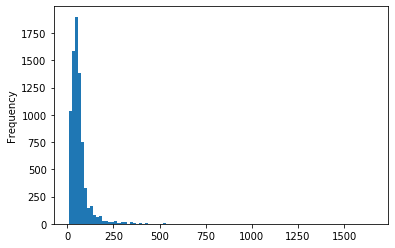

In [62]:
data['price'].plot(kind = 'hist',bins =100)
print('price Max: ',data['price'].median())
plt.savefig("download3.png")

In [50]:
data['group'] = pd.cut(x= data['price'],
                      bins = [0,50,100,150,200,500,1657],
                      labels = ['group_1','group_2','group_3','group_4','group5','group6'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 11 columns):
accommodates       7696 non-null float64
bedrooms           7696 non-null float64
bathrooms          7696 non-null float64
minstay            7696 non-null float64
latitude           7696 non-null float64
longitude          7696 non-null float64
Entire home/apt    7696 non-null float64
Private room       7696 non-null float64
Shared room        7696 non-null float64
price              7696 non-null int64
group              7696 non-null category
dtypes: category(1), float64(9), int64(1)
memory usage: 609.1 KB


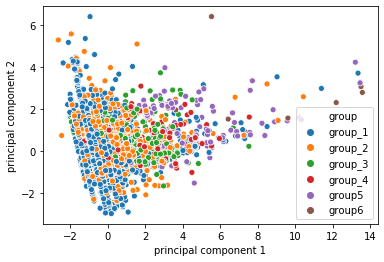

In [51]:
pca_data = pd.concat([principalDf,data['group']], axis = 1)
# pca_data
sns.scatterplot(data= pca_data,x='principal component 1',y='principal component 2',hue='group')
plt.savefig("download4.png")

In [52]:
pca_3D = PCA(n_components=3)
principalComponent = pca_3D.fit_transform(data_seoul)
pca_3Ds = pd.DataFrame(data = principalComponent
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
pca_data_3d = pd.concat([pca_3Ds,data['group']], axis = 1)
pca_data_3d

,principal component 1,principal component 2,principal component 3,group
0,0.513898,-0.621687,0.565602,group_1
1,-0.570388,-0.852471,0.594309,group_1
2,-1.085328,-0.934941,-0.434564,group_4
3,0.503035,-0.599118,-0.359828,group_1
4,-0.583085,-0.822811,-0.325462,group_1
...,...,...,...,...
7691,-0.646720,1.200412,-0.172330,group_2
7692,-0.779655,1.425056,-1.014641,group_2
7693,0.180219,-1.116324,0.096058,group_1
7694,0.129973,-0.905506,0.626760,group_1


In [53]:
pca_data_3d['group'].unique()

[group_1, group_4, group_2, group_3, group5, group6]
Categories (6, object): [group_1 < group_2 < group_3 < group_4 < group5 < group6]

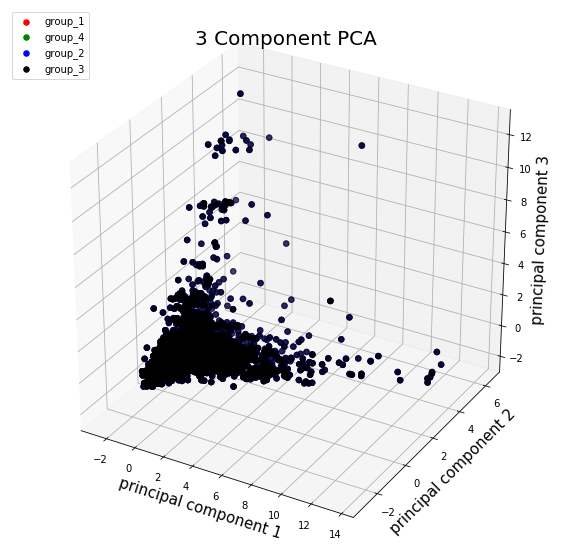

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_zlabel('principal component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)
colors = ['red','green','blue','black','cyan','yellow']
groups = pca_data_3d['group'].unique()
for dt, color, group in zip(pca_data_3d, colors, groups):
    ax.scatter(pca_data_3d['principal component 1'],
               pca_data_3d['principal component 2'],
               pca_data_3d['principal component 3'],
               c = color, s = 30, label = group)
    plt.legend(loc = 2)
plt.show()

In [110]:
#Original Data
# data.head()
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(data,data['group']):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 11 columns):
accommodates       7696 non-null float64
bedrooms           7696 non-null float64
bathrooms          7696 non-null float64
minstay            7696 non-null float64
latitude           7696 non-null float64
longitude          7696 non-null float64
Entire home/apt    7696 non-null float64
Private room       7696 non-null float64
Shared room        7696 non-null float64
price              7696 non-null int64
group              7696 non-null category
dtypes: category(1), float64(9), int64(1)
memory usage: 609.1 KB


In [112]:
# PCA 3D data
# data= pd.concat([pca_3Ds,roomtype,value,data['group']], axis = 1)
# data.head()
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
# for train_index, test_index in split.split(data,data['group']):
#     train = data.loc[train_index]
#     test = data.loc[test_index]

In [113]:
# PCA 2D data
# data = pd.concat([principalDf,roomtype,value,data['group']], axis = 1)

# data.head()
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
# for train_index, test_index in split.split(data,data['group']):
#     train = data.loc[train_index]
#     test = data.loc[test_index]

In [114]:
train['group'].value_counts() / len(train)

group_1    0.478882
group_2    0.408869
group_3    0.066277
group_4    0.024042
group5     0.020305
group6     0.001624
Name: group, dtype: float64

In [115]:
test['group'].value_counts() / len(test)

group_1    0.479221
group_2    0.408442
group_3    0.066234
group_4    0.024026
group5     0.020130
group6     0.001948
Name: group, dtype: float64

In [116]:
train.drop('group',axis = 1,inplace = True)
test.drop('group',axis = 1,inplace = True)

In [117]:
train_y = train[['price']]
train_X = train.drop('price', axis = 1)

test_y = test[['price']]
test_X = test.drop('price', axis = 1)

In [118]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6156 entries, 4396 to 5643
Data columns (total 9 columns):
accommodates       6156 non-null float64
bedrooms           6156 non-null float64
bathrooms          6156 non-null float64
minstay            6156 non-null float64
latitude           6156 non-null float64
longitude          6156 non-null float64
Entire home/apt    6156 non-null float64
Private room       6156 non-null float64
Shared room        6156 non-null float64
dtypes: float64(9)
memory usage: 480.9 KB


In [119]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 4094 to 3557
Data columns (total 9 columns):
accommodates       1540 non-null float64
bedrooms           1540 non-null float64
bathrooms          1540 non-null float64
minstay            1540 non-null float64
latitude           1540 non-null float64
longitude          1540 non-null float64
Entire home/apt    1540 non-null float64
Private room       1540 non-null float64
Shared room        1540 non-null float64
dtypes: float64(9)
memory usage: 120.3 KB


In [139]:
test_realsample = pd.DataFrame(columns = data.columns)
test_realsample.loc[0] = [2,1,1,1,37.55075009999999, 126.9197092,1,0,0,30,'group_1']
test_realsample.loc[0] = [4,2,1,2,37.5536067, 126.9696195,1,0,0,64,'group_2']
test_real_y = test_realsample[['price']]
test_realsample
x = test_realsample[['Entire home/apt','Private room','Shared room']]
test_real_X = test_realsample.drop(['price','group','Entire home/apt',
                                    'Private room','Shared room'],axis = 1)
test_real_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude
0,4,2,1,2,37.553607,126.969619


In [140]:
stand.fit(test_real_X)
test_real_X = stand.transform(test_real_X)
test_real_X = pd.DataFrame(test_real_X, columns = ['accommodates','bedrooms','bathrooms',
                                                'minstay','latitude','longitude'])
test_real_X = pd.concat([test_real_X,x],axis = 1)
test_real_X
# test_real_y

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [122]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor(random_state=42)
r_reg.fit(train_X,train_y)

C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [125]:
from sklearn.metrics import mean_squared_error
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y,predictions)
rmse = np.sqrt(mse)
rmse

15.886858640174635

In [297]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y,predictions)
rmse = np.sqrt(mse)
rmse

41.4673861833986

In [123]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(train_X,train_y)

C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [299]:
predictions = mlp.predict(train_X)
mse = mean_squared_error(train_y,predictions)
rmse = np.sqrt(mse)
rmse

43.48454304828039

In [126]:
predictions = mlp.predict(test_X)
mse = mean_squared_error(test_y,predictions)
rmse = np.sqrt(mse)
rmse

35.67236754241363

In [141]:
predictions = mlp.predict(test_real_X)
mse = mean_squared_error(test_real_y,predictions)
rmse = np.sqrt(mse)
predictions

array([75.40301875])

In [301]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_X,train_y)

C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [302]:
predictions = svm.predict(train_X)
mse = mean_squared_error(train_y,predictions)
rmse = np.sqrt(mse)
rmse

50.11847075790632

In [303]:
predictions = svm.predict(test_X)
mse = mean_squared_error(test_y,predictions)
rmse = np.sqrt(mse)
rmse

41.621196834954496